# House Prices - Model Creation
Here I describe my approach in creating and training a predictive model for the House Prices competition at [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
np.random.seed(42)

## Loading the data

In [4]:
df_train = pd.read_csv('../datasets/train_preprocessed.csv', index_col=0, na_values=[''],
                       keep_default_na=False)

In [5]:
df_train.head()

,1stFlrSF__log1p,2ndFlrSF__log1p,BedroomAbvGr,BsmtCond__cat,BsmtExposure__cat,BsmtMeanRating,BsmtQual__cat,BsmtUnfSF__sqrt,ExterCond__cat,ExterQual__cat,...,SeasonSold_Winter,StdElectrical,TotRmsAbvGrd,TotalBathrooms,TotalBsmtSF__log1p,TotalPorchSF,TypicalFunc,WoodDeckSF__log1p,YrSold,SalePrice__log1p
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.777287,1.196876,0.169927,0.138318,-0.584669,0.908418,0.612167,-0.866384,-0.230047,1.039805,...,2.670378,0.30404,0.986849,1.656672,0.019120,-0.261852,0.271213,-0.945126,0.157646,12.247699
2,0.424865,-0.863610,0.169927,0.138318,2.222317,0.492535,0.612167,-0.423996,-0.230047,-0.683756,...,-0.374479,0.30404,-0.287758,0.595253,0.347142,-0.827273,0.271213,1.254212,-0.602962,12.109016
3,-0.554028,1.201129,0.169927,0.138318,0.350993,0.908418,0.612167,-0.041603,-0.230047,1.039805,...,-0.374479,0.30404,-0.287758,1.656672,0.080039,-0.437967,0.271213,-0.945126,0.157646,12.317171
4,-0.419015,1.159720,0.169927,1.901415,-0.584669,0.492535,-0.628746,0.189467,-0.230047,-0.683756,...,2.670378,0.30404,0.349546,-0.466166,-0.085828,2.018368,0.271213,-0.945126,-1.363569,11.849405
5,0.123520,1.260739,1.385655,0.138318,1.286655,0.908418,0.612167,0.083602,-0.230047,1.039805,...,2.670378,0.30404,1.624153,1.656672,0.264916,-0.048661,0.271213,1.085318,0.157646,12.429220


In [6]:
df_test = pd.read_csv('../datasets/test_preprocessed.csv', index_col=0, na_values=[''],
                      keep_default_na=False)

In [7]:
df_test.head()

,1stFlrSF__log1p,2ndFlrSF__log1p,BedroomAbvGr,BsmtCond__cat,BsmtExposure__cat,BsmtMeanRating,BsmtQual__cat,BsmtUnfSF__sqrt,ExterCond__cat,ExterQual__cat,...,SeasonSold_Summer,SeasonSold_Winter,StdElectrical,TotRmsAbvGrd,TotalBathrooms,TotalBsmtSF__log1p,TotalPorchSF,TypicalFunc,WoodDeckSF__log1p,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1461,-0.635877,-0.863610,-1.045801,0.138318,-0.584669,0.076651,-0.628746,-0.464405,-0.230047,-0.683756,...,1.212247,-0.374479,0.30404,-0.925062,-1.527586,0.044400,0.285030,0.271213,0.964198,1.67886
1462,0.585094,-0.863610,0.169927,0.138318,-0.584669,0.492535,-0.628746,-0.107240,-0.230047,-0.683756,...,1.212247,-0.374479,0.30404,-0.287758,-0.466166,0.390863,-0.493582,0.271213,1.360662,1.67886
1463,-0.527218,1.136698,0.169927,0.138318,-0.584669,0.908418,0.612167,-0.918525,-0.230047,-0.683756,...,-0.824914,-0.374479,0.30404,-0.287758,0.595253,0.087354,-0.512120,0.271213,1.123361,1.67886
1464,-0.533898,1.126531,0.169927,0.138318,-0.584669,0.908418,-0.628746,-0.313737,-0.230047,-0.683756,...,1.212247,-0.374479,0.30404,0.349546,0.595253,0.085531,-0.493582,0.271213,1.326913,1.67886
1465,0.468732,-0.863610,-1.045801,0.138318,-0.584669,0.492535,0.612167,1.020715,-0.230047,1.039805,...,-0.824914,2.670378,0.30404,-0.925062,-0.466166,0.359112,1.267564,0.271213,-0.945126,1.67886


In [8]:
X_train = df_train.drop('SalePrice__log1p', axis=1).values
y_train = df_train['SalePrice__log1p'].values

In [9]:
X_train.shape, y_train.shape

((1460, 131), (1460,))

In [10]:
X_test = df_test.values

In [11]:
X_test.shape

(1459, 131)

In [12]:
feature_names = df_train.columns.tolist()
feature_names

['1stFlrSF__log1p',
 '2ndFlrSF__log1p',
 'BedroomAbvGr',
 'BsmtCond__cat',
 'BsmtExposure__cat',
 'BsmtMeanRating',
 'BsmtQual__cat',
 'BsmtUnfSF__sqrt',
 'ExterCond__cat',
 'ExterQual__cat',
 'Exterior1st__cat_BrkFace',
 'Exterior1st__cat_CemntBd',
 'Exterior1st__cat_HdBoard',
 'Exterior1st__cat_MetalSd',
 'Exterior1st__cat_Other',
 'Exterior1st__cat_Plywood',
 'Exterior1st__cat_VinylSd',
 'Exterior1st__cat_Wd Sdng',
 'Exterior1st__cat_WdShing',
 'Exterior2nd__cat_AsphShn',
 'Exterior2nd__cat_CmentBd',
 'Exterior2nd__cat_HdBoard',
 'Exterior2nd__cat_ImStucc',
 'Exterior2nd__cat_MetalSd',
 'Exterior2nd__cat_Other',
 'Exterior2nd__cat_Plywood',
 'Exterior2nd__cat_VinylSd',
 'Exterior2nd__cat_Wd Sdng',
 'Exterior2nd__cat_Wd Shng',
 'FireplacesQu',
 'Foundation__cat_BrkTil',
 'Foundation__cat_CBlock',
 'Foundation__cat_Other',
 'Foundation__cat_PConc',
 'GarageAge',
 'GarageArea__sqrt',
 'GarageCond__cat',
 'GarageFinish__cat',
 'GarageQual__cat',
 'GarageType__cat_Attchd',
 'GarageType__

The training and test data sets were already cleaned and transformed in the preprocesing step, so I just loaded the data and separated the independent variables (X) from the dependent variable that we want to learn to predict (y).

## Feature selection

In [13]:
def select_features(X, y, feature_names=None):
    """Uses a LASSO regression model to select the most relevant features.
    
    Inputs:
        X  Training samples (independent variables).
        y  Training targets (dependent variable).
    
    Outputs:
        X_sel     Training samples with a lower number of features.
        selector  Selector object.
    """
    from sklearn.feature_selection import SelectFromModel
    from sklearn.linear_model import LassoCV

    lasso_cv = LassoCV(alphas=np.logspace(-5, 5, 21), random_state=42)
    selector = SelectFromModel(lasso_cv)
    X_sel = selector.fit_transform(X, y)

    if feature_names:
        selected = np.array(feature_names)[selector.get_support()].tolist()
        print('Selected features: %d', len(selected))
        print(selected)

    return X_sel, selector

In [14]:
# X_train_sel, selector = select_features(X_train, y_train, feature_names)
# X_test_sel = selector.transform(X_test)
X_train_sel = X_train
X_test_sel = X_test

In [15]:
X_train_sel.shape, X_test_sel.shape

((1460, 131), (1459, 131))

As the training samples contain a lot of features (131), applying some feature selection technique in order to throw out potentially irrelevant features, thus making our model simpler, seems a good idea. I used a LASSO model to do this job.

**NOTE:** Later it turned out that NOT doing feature selection at all was better for the final model (it achieved better results on Kaggle's leaderboard). Or at least this is true for LASSO-based feature selection. Other techniques (e.g. Random Forest) may provide different results. I shall try them later.

## Model training (and parameter tuning)

In [16]:
from sklearn.metrics import make_scorer

In [17]:
def rmsle(y, y_pred):
    """Computes the root mean squared logarithmic error (RMSLE) metric.
    
    Inputs:
        y       Actual target values.
        y_pred  Predicted target values.
    
    Outputs:
        RMSLE value.
    """
    msle = np.sum((np.log1p(y) - np.log1p(y_pred))**2) / np.prod(y_pred.shape)
    return np.sqrt(msle)

### LASSO model

In [18]:
def train_lasso(X, y):
    """Trains a tuned LASSO regression model using grid search and 10-fold
    cross-validation.
    
    Inputs:
        X  Training samples (independent variables).
        y  Training targets (dependent variables).
    
    Outputs:
        Tuned LASSO regression model.
    """
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import GridSearchCV

    lasso_gs = GridSearchCV(
        estimator=Lasso(max_iter=10000, random_state=42),
        scoring=make_scorer(rmsle, greater_is_better=False),
        param_grid={
            'alpha': np.logspace(-5, 5, 21)
        },
        cv=10,
        n_jobs=-1,
        verbose=1,
    ).fit(X, y)

    print('Best score:', lasso_gs.best_score_)
    print('Best params:', lasso_gs.best_params_)

    return lasso_gs.best_estimator_.fit(X, y)

In [19]:
lasso = train_lasso(X_train_sel, y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 207 out of 210 | elapsed:   38.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   38.0s finished


Best score: -0.00969556366911
Best params: {'alpha': 0.0031622776601683794}


LASSO is a linear regression model that uses L1-regularization. In order to get the best results from it, we have to set a good value for the `alpha` parameter, which determines the amount of regularization it uses when fitting the data. Here I used grid search and a 10-fold cross-validation process to find the best value for `alpha`.

### XGBoost model

In [20]:
def train_xgboost(X, y):
    """Trains a tuned XGBoost regression model using grid search and 10-fold
    cross-validation.
    
    Inputs:
        X  Training samples (independent variables).
        y  Training targets (dependent variables).
    
    Outputs:
        Tuned XGBoost regression model.
    """
    from xgboost import XGBRegressor
    from sklearn.model_selection import GridSearchCV

    # # Tune n_estimators.
    # xgb_gs = GridSearchCV(
    #     estimator=XGBRegressor(
    #         max_depth=4,
    #         min_child_weight=1,
    #         gamma=0,
    #         subsample=0.8,
    #         colsample_bytree=0.8,
    #         seed=42),
    #     scoring=make_scorer(rmsle, greater_is_better=False),
    #     param_grid={
    #         'n_estimators': np.linspace(100, 1000, 10, dtype=int)
    #     },
    #     cv=10,
    #     n_jobs=-1,
    #     verbose=1,
    # ).fit(X, y)
    # print('Best score:', xgb_gs.best_score_)
    # print('Best params:', xgb_gs.best_params_)

    # # Tune max_depth and min_child_weight.
    # xgb_gs = GridSearchCV(
    #     estimator=XGBRegressor(
    #         gamma=0,
    #         subsample=0.8,
    #         colsample_bytree=0.8,
    #         seed=42),
    #     scoring=make_scorer(rmsle, greater_is_better=False),
    #     param_grid={
    #         'n_estimators': [xgb_gs.best_params_['n_estimators']],
    #         'max_depth': np.linspace(2, 6, 5, dtype=int),
    #         'min_child_weight': np.linspace(1, 3, 5),
    #     },
    #     cv=10,
    #     n_jobs=-1,
    #     verbose=1,
    # ).fit(X, y)
    # print('Best score:', xgb_gs.best_score_)
    # print('Best params:', xgb_gs.best_params_)

    # # Tune gamma.
    # xgb_gs = GridSearchCV(
    #     estimator=XGBRegressor(
    #         subsample=0.8,
    #         colsample_bytree=0.8,
    #         seed=42),
    #     scoring=make_scorer(rmsle, greater_is_better=False),
    #     param_grid={
    #         'n_estimators': [xgb_gs.best_params_['n_estimators']],
    #         'max_depth': [xgb_gs.best_params_['max_depth']],
    #         'min_child_weight': [xgb_gs.best_params_['min_child_weight']],
    #         'gamma': np.linspace(0, 0.1, 11),
    #     },
    #     cv=10,
    #     n_jobs=-1,
    #     verbose=1,
    # ).fit(X, y)
    # print('Best score:', xgb_gs.best_score_)
    # print('Best params:', xgb_gs.best_params_)

    # # Tune subsample and colsample_bytree.
    # xgb_gs = GridSearchCV(
    #     estimator=XGBRegressor(
    #         seed=42),
    #     scoring=make_scorer(rmsle, greater_is_better=False),
    #     param_grid={
    #         'n_estimators': [xgb_gs.best_params_['n_estimators']],
    #         'max_depth': [xgb_gs.best_params_['max_depth']],
    #         'min_child_weight': [xgb_gs.best_params_['min_child_weight']],
    #         'gamma': [xgb_gs.best_params_['gamma']],
    #         'subsample': np.linspace(0.6, 0.9, 4),
    #         'colsample_bytree': np.linspace(0.6, 0.9, 4),
    #     },
    #     cv=10,
    #     n_jobs=-1,
    #     verbose=1,
    # ).fit(X, y)
    # print('Best score:', xgb_gs.best_score_)
    # print('Best params:', xgb_gs.best_params_)

    # # Tune reg_alpha and reg_lambda.
    # xgb_gs = GridSearchCV(
    #     estimator=XGBRegressor(
    #         seed=42),
    #     scoring=make_scorer(rmsle, greater_is_better=False),
    #     param_grid={
    #         'n_estimators': [xgb_gs.best_params_['n_estimators']],
    #         'max_depth': [xgb_gs.best_params_['max_depth']],
    #         'min_child_weight': [xgb_gs.best_params_['min_child_weight']],
    #         'gamma': [xgb_gs.best_params_['gamma']],
    #         'subsample': [xgb_gs.best_params_['subsample']],
    #         'colsample_bytree': [xgb_gs.best_params_['colsample_bytree']],
    #         'reg_alpha': np.linspace(0, 1, 4),
    #         'reg_lambda': np.linspace(0, 1, 4),
    #     },
    #     cv=10,
    #     n_jobs=-1,
    #     verbose=1,
    # ).fit(X, y)
    # print('Best score:', xgb_gs.best_score_)
    # print('Best params:', xgb_gs.best_params_)

    # # Set a lower learning_rate and increase n_estimators.
    # xgb = XGBRegressor(
    #     learning_rate=0.01,
    #     n_estimators=xgb_gs.best_params_['n_estimators'] * 10,
    #     max_depth=xgb_gs.best_params_['max_depth'],
    #     min_child_weight=xgb_gs.best_params_['min_child_weight'],
    #     gamma=xgb_gs.best_params_['gamma'],
    #     subsample=xgb_gs.best_params_['subsample'],
    #     colsample_bytree=xgb_gs.best_params_['colsample_bytree'],
    #     reg_alpha=xgb_gs.best_params_['reg_alpha'],
    #     reg_lambda=xgb_gs.best_params_['reg_lambda'],
    #     seed=42,
    # )

    # Final estimator (best score).
    xgb = XGBRegressor(
        learning_rate=0.005,
        n_estimators=10000,
        max_depth=3,
        min_child_weight=1,
        gamma=0,
        subsample=0.9,
        colsample_bytree=0.6,
        reg_alpha=0,
        reg_lambda=1,
        seed=42,
    )

    return xgb.fit(X, y)

In [21]:
xgb = train_xgboost(X_train_sel, y_train)

/home/chvillap/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBoost regression is a very efficient gradient boosting algorithm. It has a lot of parameters whose values need to be properly tuned. Here this process was done in little steps, always using grid search and 10-fold cross-validation. In the end, I kept the best parameter values and used them to build the model directly.

## Learning curves

In [22]:
from copy import deepcopy

In [23]:
def plot_learning_curves(estimators, title, X, y, ylim=None, cv=None,
                         scoring=make_scorer(rmsle, greater_is_better=False),
                         train_sizes=np.linspace(0.1, 1, 5), n_jobs=-1):
    """Plots training and validation errors for increasingly bigger portions of
    the data set, showing the learning progress.
    
    Inputs:
        estimators    List of models to evaluate.
        title         Graph title.
        X             Training/validation samples (independent variables).
        y             Training/validation targets (dependent variables).
        ylim          Limits of the displayed y values in the graph.
        cv            Cross-validation object or number of folds.
        scoring       Scoring function that evaluates the models.
        train_sizes   Portions of the training set used in the evaluations.
        n_jobs        Number of jobs (threads).
    
    Outputs:
        None
    """
    from sklearn.model_selection import learning_curve

    palette = sns.color_palette()

    for i in range(len(estimators)):
        train_sizes, train_scores, valid_scores = learning_curve(
            estimators[i], X, y, cv=cv, scoring=scoring,
            train_sizes=train_sizes, n_jobs=n_jobs)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        valid_scores_mean = np.mean(valid_scores, axis=1)
        valid_scores_std = np.std(valid_scores, axis=1)

        sns.plt.plot(train_sizes, train_scores_mean, 'o--', color=palette[i],
            label=type(estimators[i]).__name__ + ' (train)')
        sns.plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
            train_scores_mean + train_scores_std, alpha=0.1, color=palette[i])

        sns.plt.plot(train_sizes, valid_scores_mean, 'o-', color=palette[i],
            label=type(estimators[i]).__name__ + ' (cv)')
        sns.plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
            valid_scores_mean + valid_scores_std, alpha=0.1, color=palette[i])

    if ylim is not None:
        sns.plt.ylim(*ylim)

    sns.plt.grid('on')
    sns.plt.legend(loc='best')
    sns.plt.show()

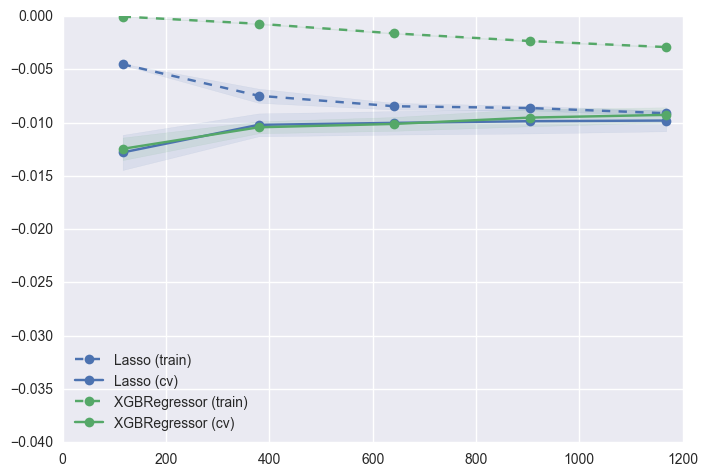

In [24]:
plot_learning_curves([deepcopy(lasso), deepcopy(xgb)], 'Learning Curves',
                     X_train_sel, y_train, ylim=(-0.04, 0), cv=5, n_jobs=-1)

Learning curves are a graphical technique used to evaluate the performance of predictive models. They plot the training and validation errors for an increasingly quantity of training samples, thus showing how the learning evolves as we feed the algorithm with more and more data.

The curves in the graph above show that both models are doing a fine job in predicting the outputs for the validation samples (the metric is RMSLE, so "more negative" means "worse"). The XGBoost regressor would be especially benefited if we had more training samples in the data set (it looks like it would continue to improve significantly).

## Making predictions

In [25]:
y_test_lasso = np.expm1(lasso.predict(X_test_sel))

In [26]:
y_test_xgb = np.expm1(xgb.predict(X_test_sel))

In [27]:
y_test = 0.65 * y_test_lasso + 0.35 * y_test_xgb

Since the target values were transformed in the preprocessing step, they had to be transformed back after the predictions were made. Then, the results from both LASSO and XGBoost model were combined with a weighted average. The weights were chosen kinda arbitrarily: the LASSO model had lower variance and therefore it should have a greater influence in the final predictions, so I tested different weight values in the competition's test set until I got the best ones.

In [28]:
df_submission = pd.DataFrame(data={'SalePrice': y_test,
                                   'SalePrice_lasso': y_test_lasso,
                                   'SalePrice_xgb': y_test_xgb},
                             index=df_test.index)

In [29]:
df_submission.head(10)

,SalePrice,SalePrice_lasso,SalePrice_xgb
Id,,,
1461,114810.507901,111567.860713,120832.570312
1462,161322.396856,159242.167037,165185.687500
1463,178782.709805,174360.605228,186995.187500
1464,192145.035375,191191.376539,193916.125000
1465,196360.075843,204401.823412,181425.406250
1466,170030.580623,169324.661295,171341.578125
1467,174987.384501,177066.228560,171126.671875
1468,162603.516231,161431.869922,164779.437500
1469,193710.893055,198204.138354,185366.296875


In [30]:
df_submission[['SalePrice']].to_csv('submission.csv')

Finally, the predicted prices were saved in a CSV file ready to be submitted to Kaggle.

With this solution, an RMSLE score of **0.12176** was achieved in the competition's test set.